# Intro to Pandas

Now I'm ready to comment.

Statistics is about analyzing data. In this class we will use Python to explore and analyze real data sets. The pandas and numpy packages will be used for data manipulation and modeling, and the matplotlib library will be used for visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cars=pd.read_csv('cars.csv')

In [3]:
cars.head()

,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449


In [4]:
cars.describe()

,MPG,CYL,ENG,WGT
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,2977.584184
std,7.805007,1.705783,104.644004,849.402560
min,9.000000,3.000000,68.000000,1613.000000
25%,17.000000,4.000000,105.000000,2225.250000
50%,22.750000,4.000000,151.000000,2803.500000
75%,29.000000,8.000000,275.750000,3614.750000
max,46.599998,8.000000,455.000000,5140.000000


In [5]:
cars.shape

(392, 4)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MPG     392 non-null    float64
 1   CYL     392 non-null    int64  
 2   ENG     392 non-null    float64
 3   WGT     392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.4 KB


In [7]:
cars['MPG']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: MPG, Length: 392, dtype: float64

In [8]:
cars.MPG

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: MPG, Length: 392, dtype: float64

In [9]:
cars[['MPG','WGT','CYL']].head(10)

,MPG,WGT,CYL
0,18.0,3504,8
1,15.0,3693,8
2,18.0,3436,8
3,16.0,3433,8
4,17.0,3449,8
5,15.0,4341,8
6,14.0,4354,8
7,14.0,4312,8
8,14.0,4425,8
9,15.0,3850,8


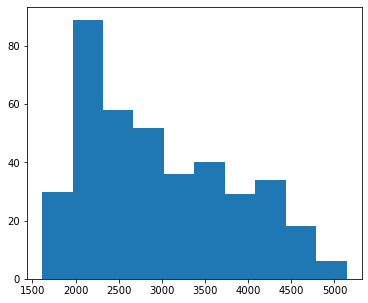

In [10]:
fig, ax = plt.subplots(figsize=(6,5))  # make one subplot (ax) on the figure
ax.hist(cars['WGT'])
plt.show()

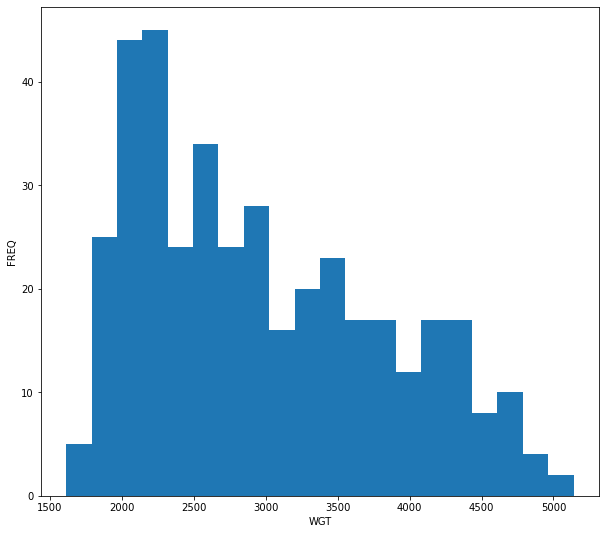

In [11]:
fig, ax = plt.subplots(figsize=(10,9))  # make one subplot (ax) on the figure
ax.hist(cars['WGT'],bins=20)
ax.set_xlabel('WGT')
ax.set_ylabel('FREQ')
plt.show()

Pandas has wrappers built around matplotlib functions too.

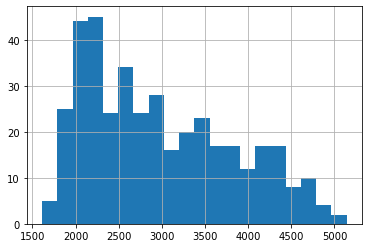

In [12]:
cars['WGT'].hist(bins=20)

Maybe you'd rather use kilometers per liter.

In [13]:
cars['KmPL']=cars['MPG']*1.61/3.79

In [14]:
cars.head()

,MPG,CYL,ENG,WGT,KmPL
0,18.0,8,307.0,3504,7.646438
1,15.0,8,350.0,3693,6.372032
2,18.0,8,318.0,3436,7.646438
3,16.0,8,304.0,3433,6.796834
4,17.0,8,302.0,3449,7.221636


In [15]:
cars['weird']=cars['ENG']+cars['KmPL']

In [16]:
cars.head()

,MPG,CYL,ENG,WGT,KmPL,weird
0,18.0,8,307.0,3504,7.646438,314.646438
1,15.0,8,350.0,3693,6.372032,356.372032
2,18.0,8,318.0,3436,7.646438,325.646438
3,16.0,8,304.0,3433,6.796834,310.796834
4,17.0,8,302.0,3449,7.221636,309.221636


How does average MPG vary by CYL?

In [17]:
avg_mpg = cars[['MPG','CYL']].groupby('CYL').mean()['MPG']
avg_mpg

CYL
3    20.550000
4    29.283920
5    27.366667
6    19.973494
8    14.963107
Name: MPG, dtype: float64

In [18]:
cyl = sorted(cars['CYL'].unique())
cyl

[3, 4, 5, 6, 8]

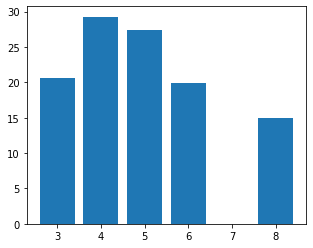

In [19]:
fig, ax = plt.subplots(figsize=(5,4))  # make one subplot (ax) on the figure
ax.bar(cyl, avg_mpg)
plt.show()

In [20]:
cyl3df=cars[cars['CYL']==3]
cyl3df

,MPG,CYL,ENG,WGT,KmPL,weird
70,19.000000,3,70.0,2330,8.071240,78.071240
110,18.000000,3,70.0,2124,7.646438,77.646438
241,21.500000,3,80.0,2720,9.133245,89.133245
331,23.700001,3,70.0,2420,10.067810,80.067810


In [21]:
cyl3=cars[cars['CYL']==3]['MPG'].values
cyl4=cars[cars['CYL']==4]['MPG'].values
cyl5=cars[cars['CYL']==5]['MPG'].values
cyl6=cars[cars['CYL']==6]['MPG'].values
cyl8=cars[cars['CYL']==8]['MPG'].values

In [22]:
cyl4[0:10]

array([24., 27., 26., 25., 24., 25., 26., 27., 28., 25.])

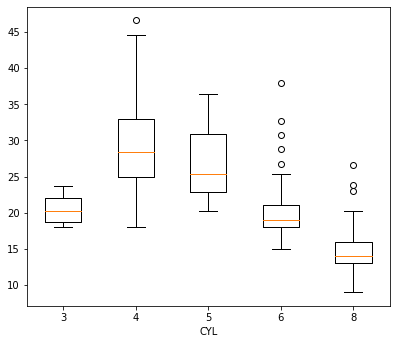

In [23]:
fig, ax = plt.subplots(figsize=(6.5,5.5))  # make one subplot (ax) on the figure
ax.boxplot([cyl3,cyl4,cyl5,cyl6,cyl8])
ax.set_xlabel("CYL")
plt.xticks([1,2,3,4,5], [3,4,5,6,8])
plt.show()

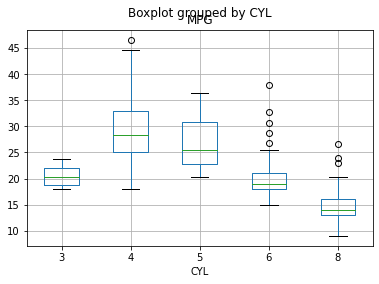

In [24]:
cars.boxplot('MPG',by='CYL')

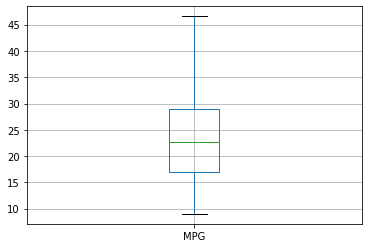

In [25]:
cars.boxplot('MPG')

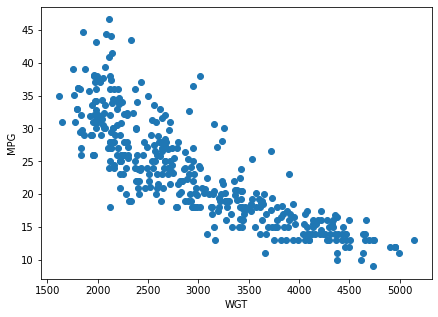

In [26]:
fig, ax = plt.subplots(figsize=(7,5))  # make one subplot (ax) on the figure
ax.scatter(cars['WGT'], cars['MPG'])
ax.set_xlabel('WGT')
ax.set_ylabel('MPG')
plt.show()

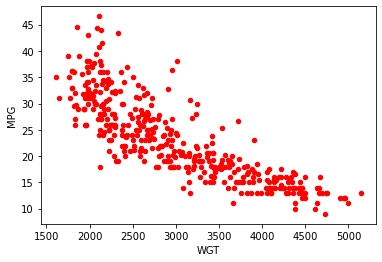

In [27]:
cars.plot.scatter(x="WGT",y="MPG",color='red')

You can save an image to the folder containing your notebook.

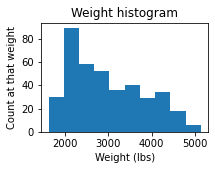

In [28]:
fig, ax = plt.subplots(figsize=(3,2))  # make one subplot (ax) on the figure
ax.hist(cars['WGT'])
ax.set_xlabel("Weight (lbs)")
ax.set_ylabel("Count at that weight")
ax.set_title("Weight histogram")
plt.savefig("my_hist.pdf", bbox_inches='tight', pad_inches=0)

We can also use python to simulate experiments... like 10000 flips of a fair coin...

In [29]:
res=[]
for i in range(10000):
    x=np.random.randint(2, size=10)
    res.append(sum(x))

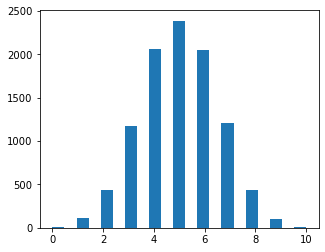

In [30]:
fig, ax = plt.subplots(figsize=(5,4))  # make one subplot (ax) on the figure
ax.hist(res,bins=21)
plt.show()

Simulation results:

In [31]:
for i in range(11):
    print(i, "heads",":",res.count(i)/10000)

0 heads : 0.0011
1 heads : 0.0115
2 heads : 0.0432
3 heads : 0.1175
4 heads : 0.2059
5 heads : 0.2389
6 heads : 0.2051
7 heads : 0.1214
8 heads : 0.044
9 heads : 0.0107
10 heads : 0.0007


Compare to the actual binomial random variable $b(10,0.5)$:

In [32]:
import math
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)
for k in range(11):
    print(k, "heads",":",np.round(nCr(10,k)/2**10,4))

0 heads : 0.001
1 heads : 0.0098
2 heads : 0.0439
3 heads : 0.1172
4 heads : 0.2051
5 heads : 0.2461
6 heads : 0.2051
7 heads : 0.1172
8 heads : 0.0439
9 heads : 0.0098
10 heads : 0.001


Let's plot the pmf for several binomial random variables:

In [33]:
bin_res=np.empty([5,11])
prob=np.arange(0.1,1,0.2)
row=0
for p in prob:
    for k in range(11):
        bin_res[row,k]= nCr(10,k)*(p**k)*(1-p)**(10-k)
    row=row+1   

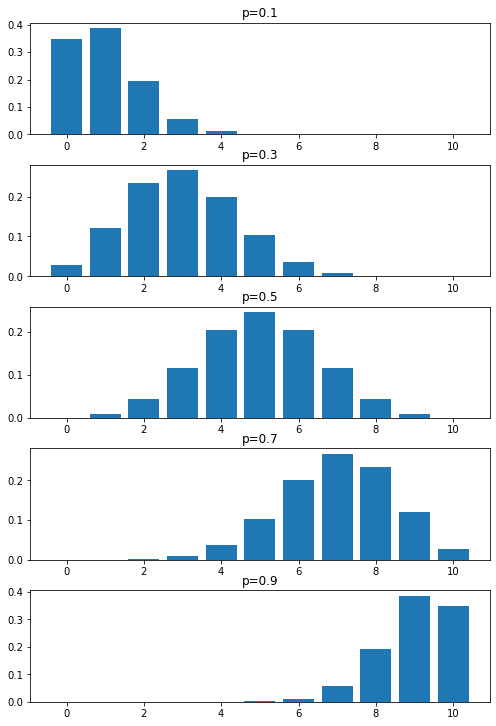

In [34]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(7,10))  # make one subplot (ax) on the figure
axes = axes.flatten() # it comes out as a 2D matrix; convert to a vector
heads=[0,1,2,3,4,5,6,7,8,9,10]
axes[0].bar(heads,bin_res[0,:])
axes[1].bar(heads,bin_res[1,:])
axes[2].bar(heads,bin_res[2,:])
axes[3].bar(heads,bin_res[3,:])
axes[4].bar(heads,bin_res[4,:])
plt.tight_layout() # I add this anytime I have a grid as it "does the right thing"
axes[0].set_title("p=0.1")
axes[1].set_title("p=0.3")
axes[2].set_title("p=0.5")
axes[3].set_title("p=0.7")
axes[4].set_title("p=0.9")
plt.show()

Let's import a small data set with average mothly temperatures in SF and Raleigh, NC.

In [35]:
sf=pd.read_csv('NCSF.csv')
sf.head()

,Month,San Francisco,Raleigh
0,Jan,49,39
1,Feb,52,42
2,Mar,53,50
3,Apr,56,59
4,May,58,67


We can look at the means of all columns: 

In [36]:
sf.mean()

San Francisco    57.25
Raleigh          59.25
dtype: float64

Or one column individually:

In [37]:
sf["San Francisco"].mean()

57.25

We might erroneously conclude that the weather in the two cities is quite similar without looking at the variance or standard deviation too:

In [38]:
sf.var()

San Francisco     33.113636
Raleigh          200.750000
dtype: float64

In [39]:
sf.std()

San Francisco     5.754445
Raleigh          14.168627
dtype: float64

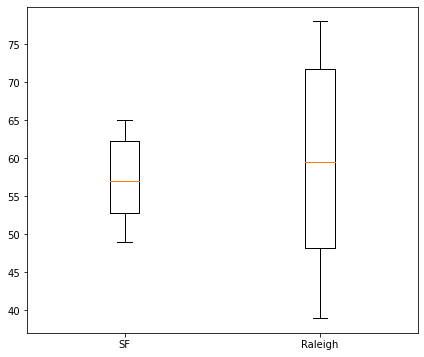

In [40]:
sfv=sf['San Francisco'].values
rv=sf['Raleigh'].values
fig, ax = plt.subplots(figsize=(7,6))
ax.boxplot([sfv,rv])
plt.xticks([1,2],["SF","Raleigh"])
plt.show()

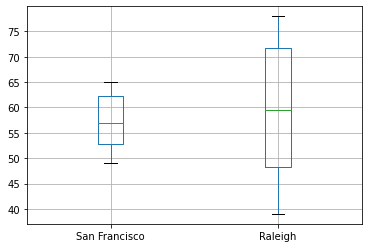

In [41]:
sf.boxplot()

Python lets us sample from continuous distributions too.

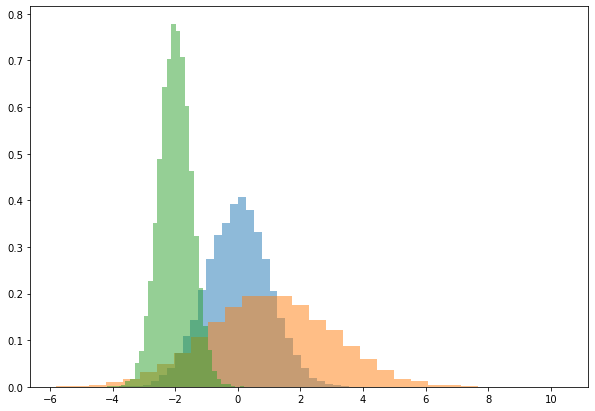

In [42]:
ndst=np.random.normal(0,1,10000)
ndst2=np.random.normal(1,2,10000)
ndst3=np.random.normal(-2,0.5,10000)
fig, ax = plt.subplots(figsize=(10,7))  # make one subplot (ax) on the figure
ax.hist(ndst,bins=30,alpha=0.5,density=True)
ax.hist(ndst2,bins=30,alpha=0.5,density=True)
ax.hist(ndst3,bins=30,alpha=0.5,density=True)
plt.show()

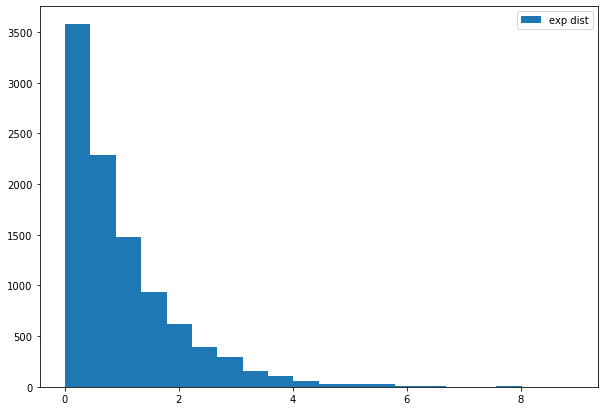

In [43]:
expdst=np.random.exponential(scale=1, size=10000)
fig, ax = plt.subplots(figsize=(10,7))  # make one subplot (ax) on the figure
ax.hist(expdst,bins=20,label="exp dist")
ax.legend(loc='upper right')
plt.show()

And compute normal probabilities:

In [44]:
import scipy.stats
scipy.stats.norm(0, 1).cdf(0)

0.5

In [45]:
scipy.stats.norm(0, 1).cdf(1)-scipy.stats.norm(0, 1).cdf(-1)

0.6826894921370859

In [46]:
def z(x):
    return scipy.stats.norm(0, 1).cdf(x)
print(z(1)-z(-1),"--",z(2)-z(-2),"--",z(3)-z(-3))

0.6826894921370859 -- 0.9544997361036416 -- 0.9973002039367398


Lots of other plotting options out there:

In [47]:
mid=[0.5]*100
tst=np.linspace(0,6.2,100)
cos=[math.cos(x) for x in tst]

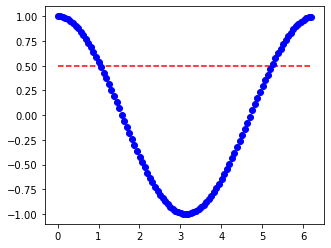

In [48]:
fig, ax = plt.subplots(figsize=(5,4))  # make one subplot (ax) on the figure
ax.plot(tst,mid,'r--',tst,cos,'bo')
plt.show()

## Exercises:

Suppose there are 40 people in a classroom. If I bet you $100 that (at least) two people in the class share the same birthday (meaning the same day and month only), would you be likely to take the bet or not? What if there were 35? 50? How many people would need to be there for you to take the bet?

1. Write a simple program to compute the probability of a birthday match based on the number of people in the room. Plot the results with the number of people on the $x$ axis and the corresponding probability on the $y$ axis. At what point (number of people) does the probability cross $50\%$?

2. Write a program that takes a sample of a given size from an exponential distribution, and computes the mean of the sample.
3. Now write a program to draw 1000 samples of size k, and store the sample means. Do this for $k=1,5,10,20,30,50$. You might want to use a numpy array for this. For example, ```np.empty([6,1000])``` will create an empty 2D array with 6 rows and 1000 columns. Each row can correspond to a different sample size and each column will be a sample mean from a sample of that row's size.
4. Now plot histograms of each row of your array (corresponding to a set of sample means of increasing sizes. Can you plot a grid of all 6 histograms in one figure, and add labels to all of them? Find the mean and standard deviation for each of the distributions you're plotting.
5. What result does your plot demonstrate?
6. Repeat the above, but this time drawinf samples from a uniform distribuion: ```np.random.uniform()```, and then a normal distribuiton: ```np.random.normal(mean,sd,size)```
7. Import and explore the ```weight-height.csv``` file.